In [2]:
import numpy as np
import matplotlib.pyplot as plt
import xarray as xr
import seaborn as sns

In [3]:
import graphufs
plt.style.use("graphufs.plotstyle")

In [ ]:
data_dir = "/Projects/ml_benchmarks"
truth = "era5"

p2 = graphufs.utils.open_dataset(f"{data_dir}/graphufs/p2/validation/graphufs_vs_{truth}_240h_deterministic_spatial.nc")
p2.attrs["name"] = "GraphUFS P2"
p2.attrs["truth"] = truth.upper()
p2c = graphufs.utils.open_dataset(f"{data_dir}/graphufs/p2p/uvwc/validation/graphufs_vs_{truth}_240h_deterministic_spatial.nc")
p2c.attrs["name"] = "GraphUFS P2c"
p2c.attrs["truth"] = truth.upper()
gc = graphufs.utils.open_dataset(f"{data_dir}/baselines/graphcast_vs_{truth}_2018_deterministic_spatial.nc")
gc.attrs["name"] = "GraphCast"
gc.attrs["truth"] = truth.upper()

In [10]:
_expt = "atm-only"
_extended_name = "Atm-only"
exp_data_dir = f"/pscratch/sd/n/nagarwal/{_expt}/R0/inference/validation"
truth = "era5"
cp1 = graphufs.utils.open_dataset(f"{exp_data_dir}/graphufs_vs_{truth}_240h_deterministic_spatial.nc")
cp1.attrs["name"] = f"GraphUFS {_extended_name}"
cp1.attrs["truth"] = truth.upper()

In [7]:
def plot_row(axr, xds, metric, fields, cmap, level=None):
    kw = {} if level is None else {"level": level}
    for v, ax in zip(fields, axr):
        if v in xds:
            plotme = xds[v].sel(
                metric=metric,
                fhr=[6, 24, 48, 24*4, 24*6, 24*8, 24*10],
            ).sel(
                **kw,
                method="nearest",
            ).mean(
                "longitude",
            )
            n_time = len(plotme.fhr)
            for itime in range(n_time):
                plotme.isel(fhr=itime).plot.line(
                    x="latitude",
                    ax=ax,
                    add_legend=False,
                    color=plt.get_cmap(cmap)(int(itime/n_time * 256)),
                    label=f"{int(plotme.fhr.isel(fhr=itime)): 3d}h",
                )
            sps = ax.get_subplotspec()
            ax.set(
                ylabel="",
                xlabel="Latitude" if sps.is_last_row() else "",
                title=" ".join([x.capitalize() if x != "of" else x for x in v.split("_")]) if sps.is_first_row() else "",
                
            )
    axr[-1].legend(title="Forecast Hour", bbox_to_anchor=(1., .55), loc="center left")

In [8]:
def plot_surface(
    xds,
    metric="mae",
    cmap="plasma",
    fields=("2m_temperature", "surface_pressure", "10m_u_component_of_wind", "10m_v_component_of_wind"),
):

    ncols = len(fields)
    fig, axs = plt.subplots(1, ncols, figsize=(4*ncols, 4), constrained_layout=True, sharex=True)
    plot_row(axs, xds, metric, fields, cmap)
    fig.suptitle(f"{metric.upper()} {xds.name} vs {xds.truth}")
    
    return fig, axs

In [9]:
def plot_levels(
    xds,
    metric="mae",
    cmap="plasma",
    fields=("geopotential", "temperature", "specific_humidity", "u_component_of_wind", "v_component_of_wind"),
    levels=(250, 500, 1000),
):
    nrows = len(levels)
    ncols = len(fields)
    fig, axs = plt.subplots(nrows, ncols, figsize=(4*ncols, 4*nrows), constrained_layout=True, sharex=True)
    for level, axr in zip(levels, axs):
        plot_row(axr, xds, metric, fields, cmap, level=level)
        axr[0].set(ylabel=f"~{int(xds.sel(level=level, method='nearest').level.values)} hPa")
    fig.suptitle(f"{metric.upper()} {xds.name} vs {xds.truth}")
    return fig, axs

NameError: name 'expt' is not defined

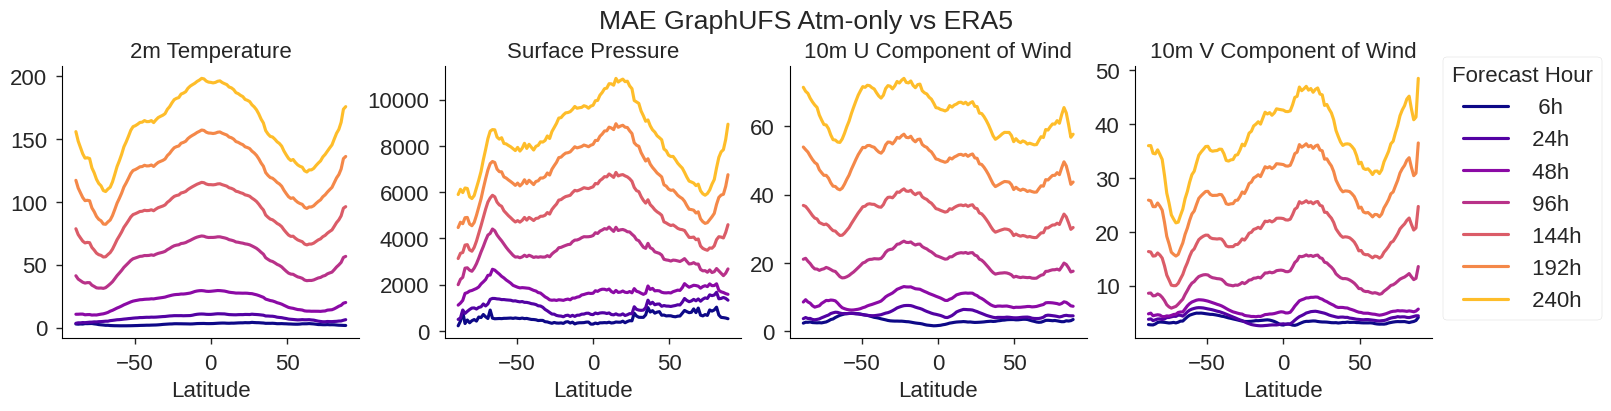

In [11]:
fig, ax = plot_surface(cp1)
_prototypes_home = "/global/homes/n/nagarwal/graph-ufs/prototypes"
_run = "R0"
_save_to = "figures"
fig.savefig(f"{_prototypes_home}/{expt.replace('-','_')}/{_run}/{_save_to}/MAE_GraphUFS_{_exp}_{_run}vs_ERA5.png", dpi=300)

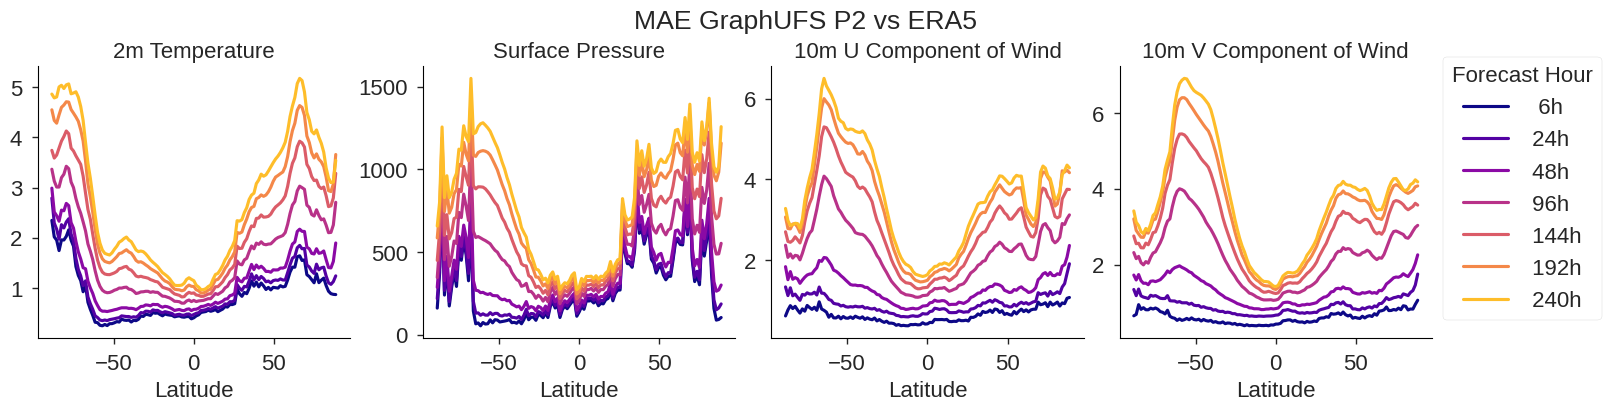

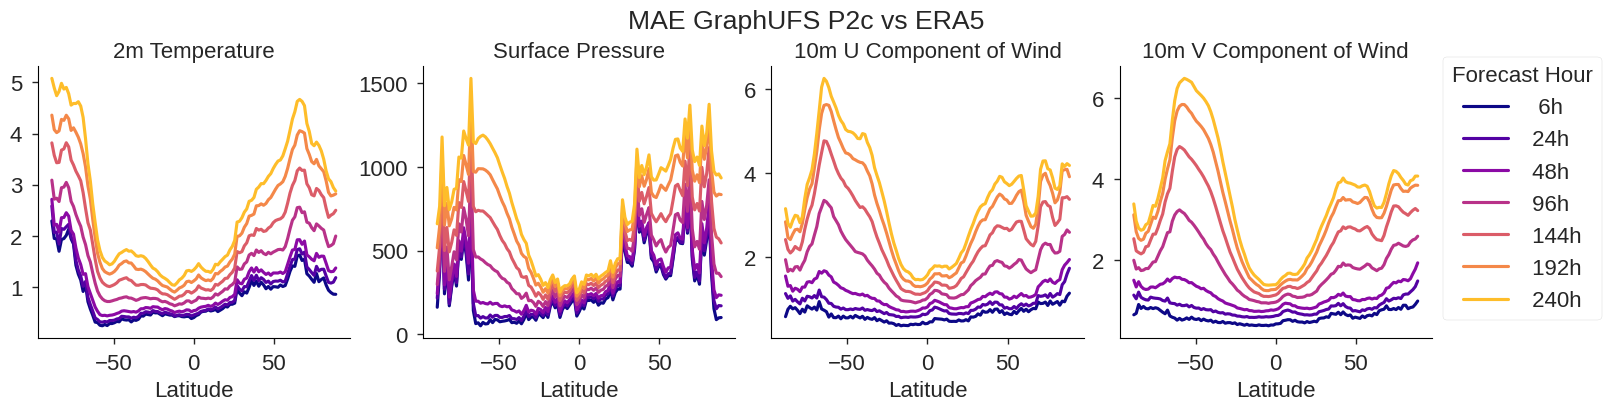

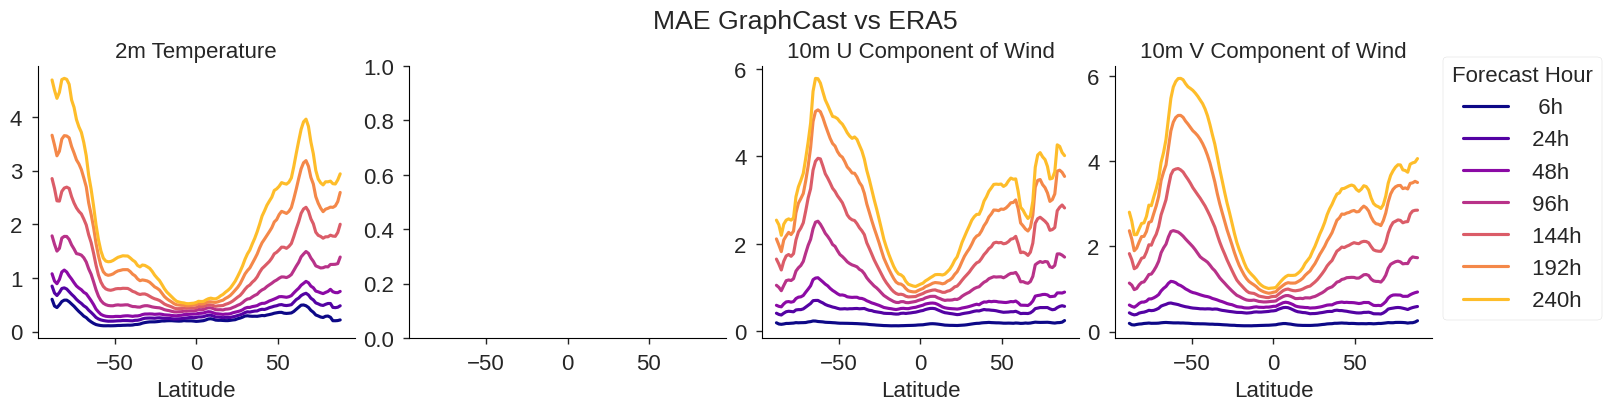

In [35]:
plot_surface(p2);
plot_surface(p2c);
plot_surface(gc);

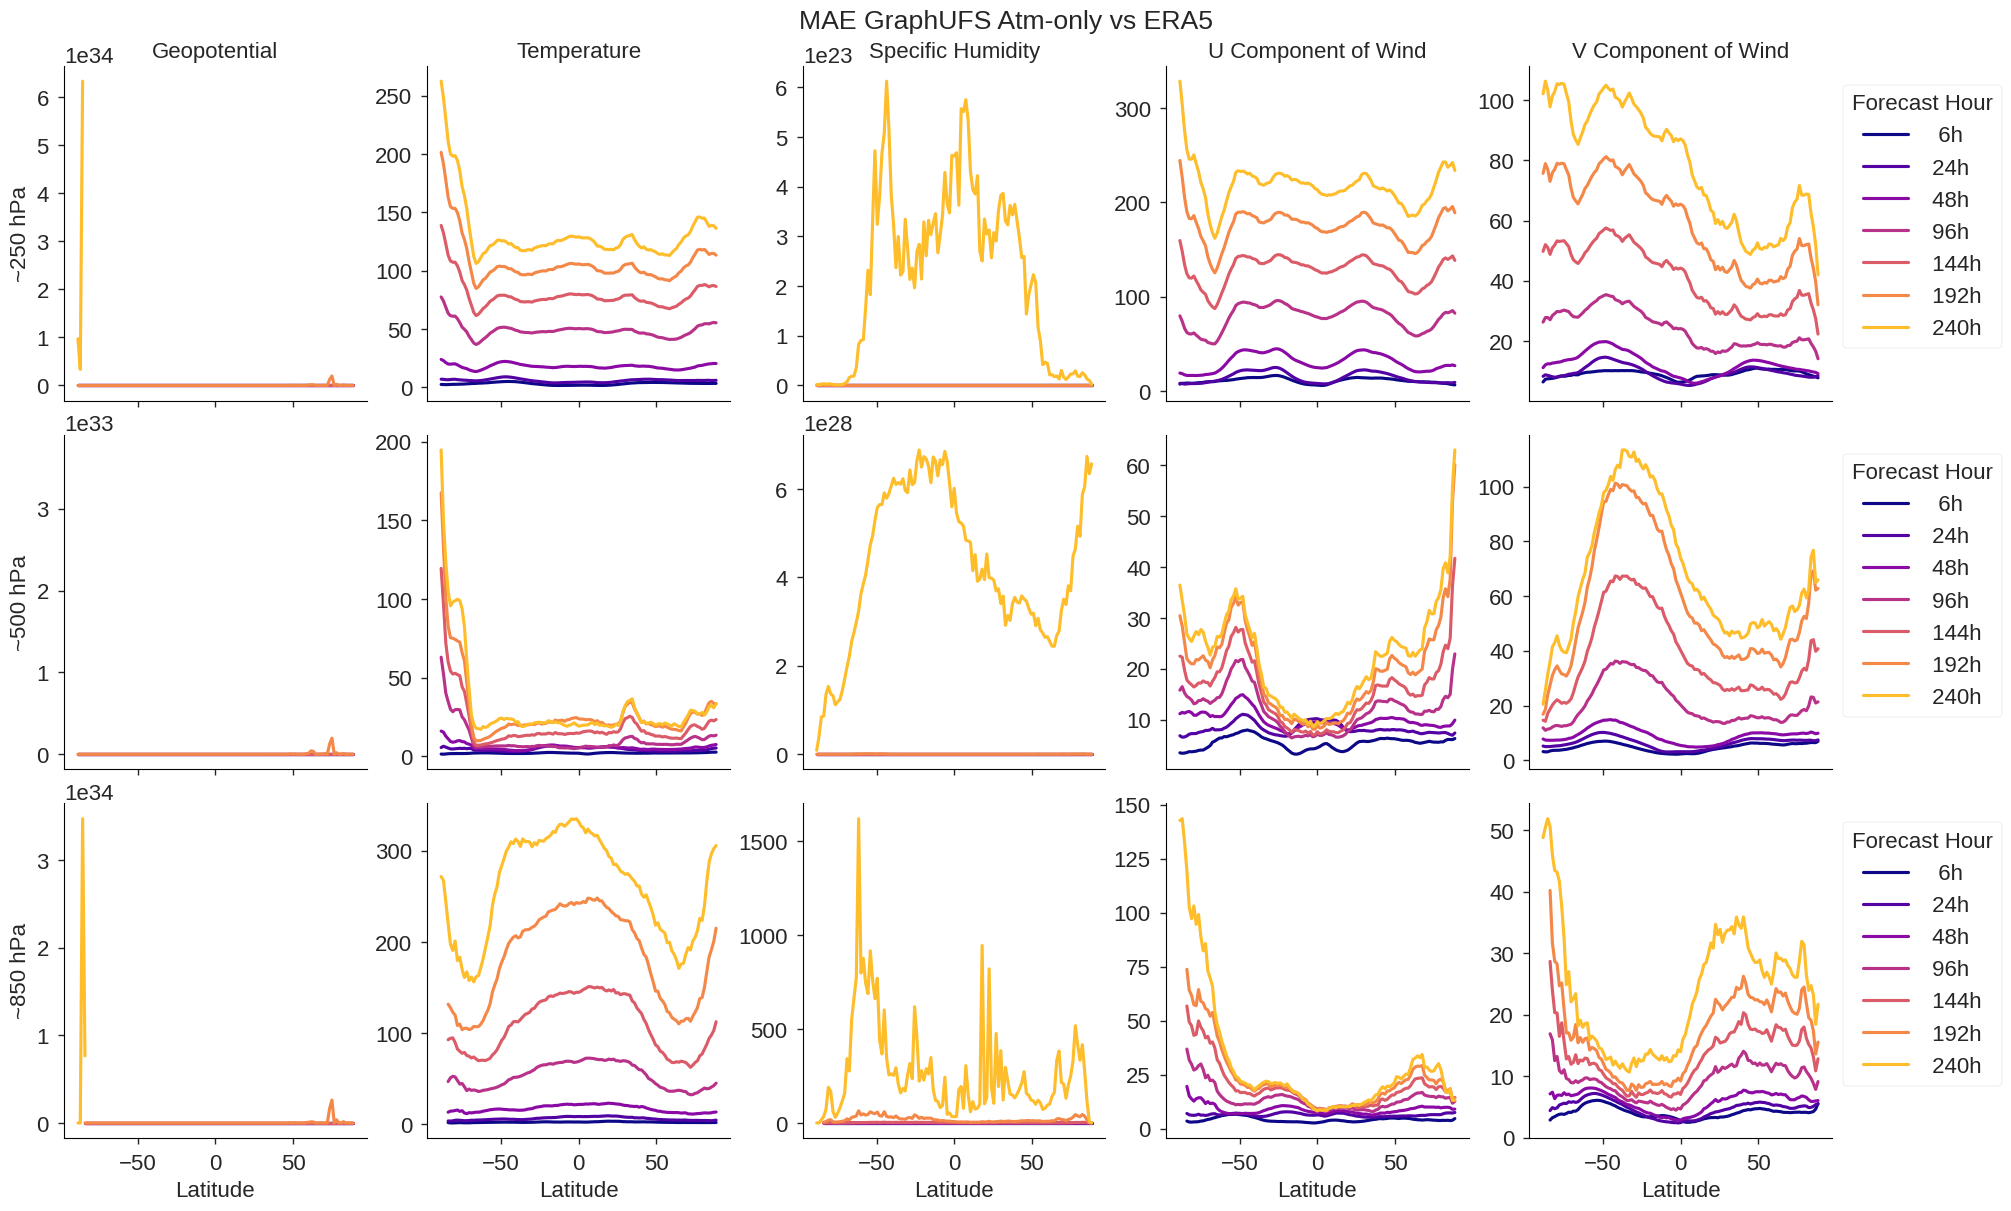

In [12]:
fig, ax = plot_levels(cp1)
#expt = "R0"
#save_to = "figures"
#fig.savefig(f"{expt}/{save_to}/MAE_GraphUFS_CP1_{expt}vs_ERA5_level=250-500-850hPa.png", dpi=300)

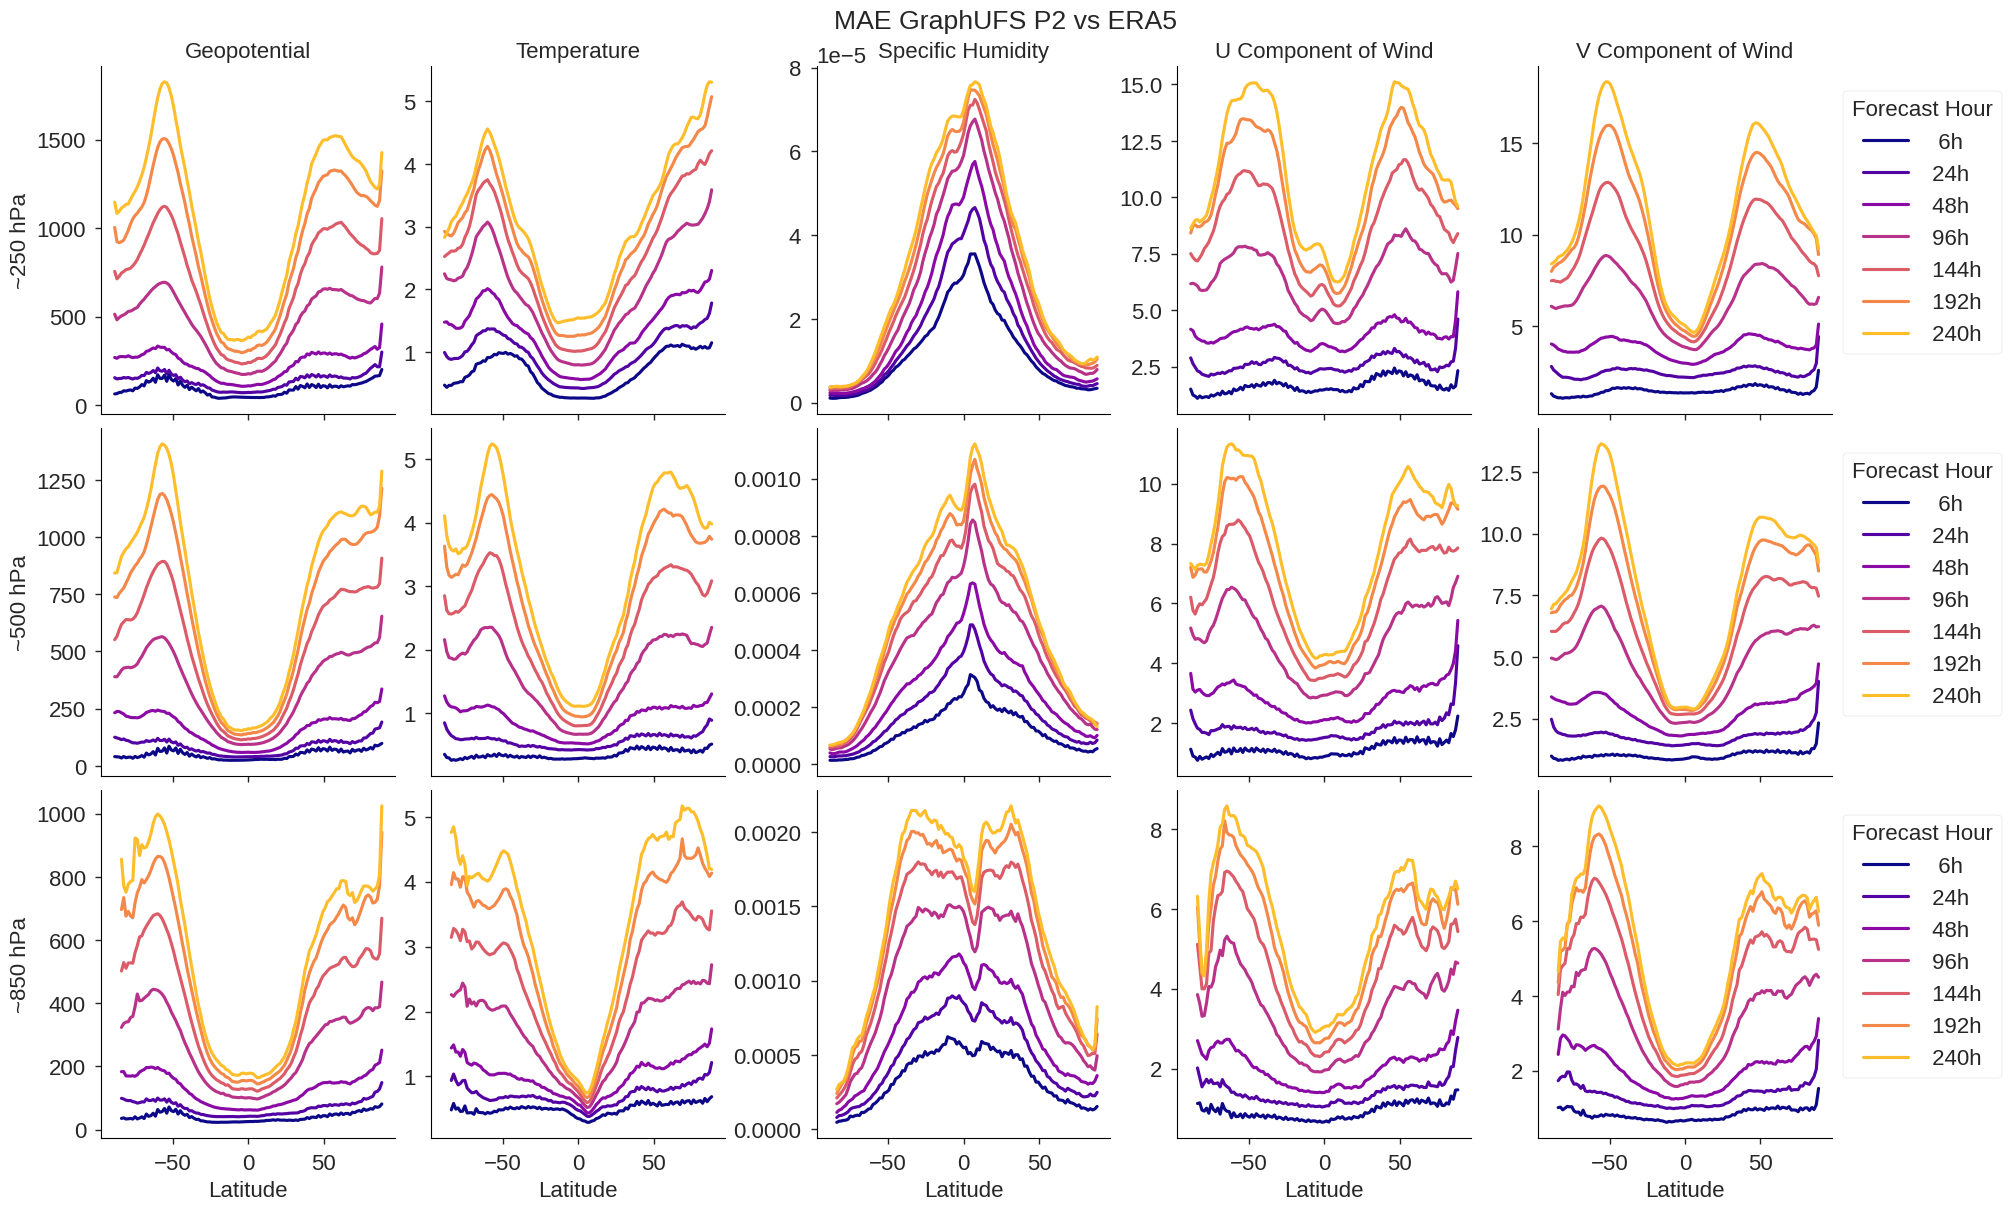

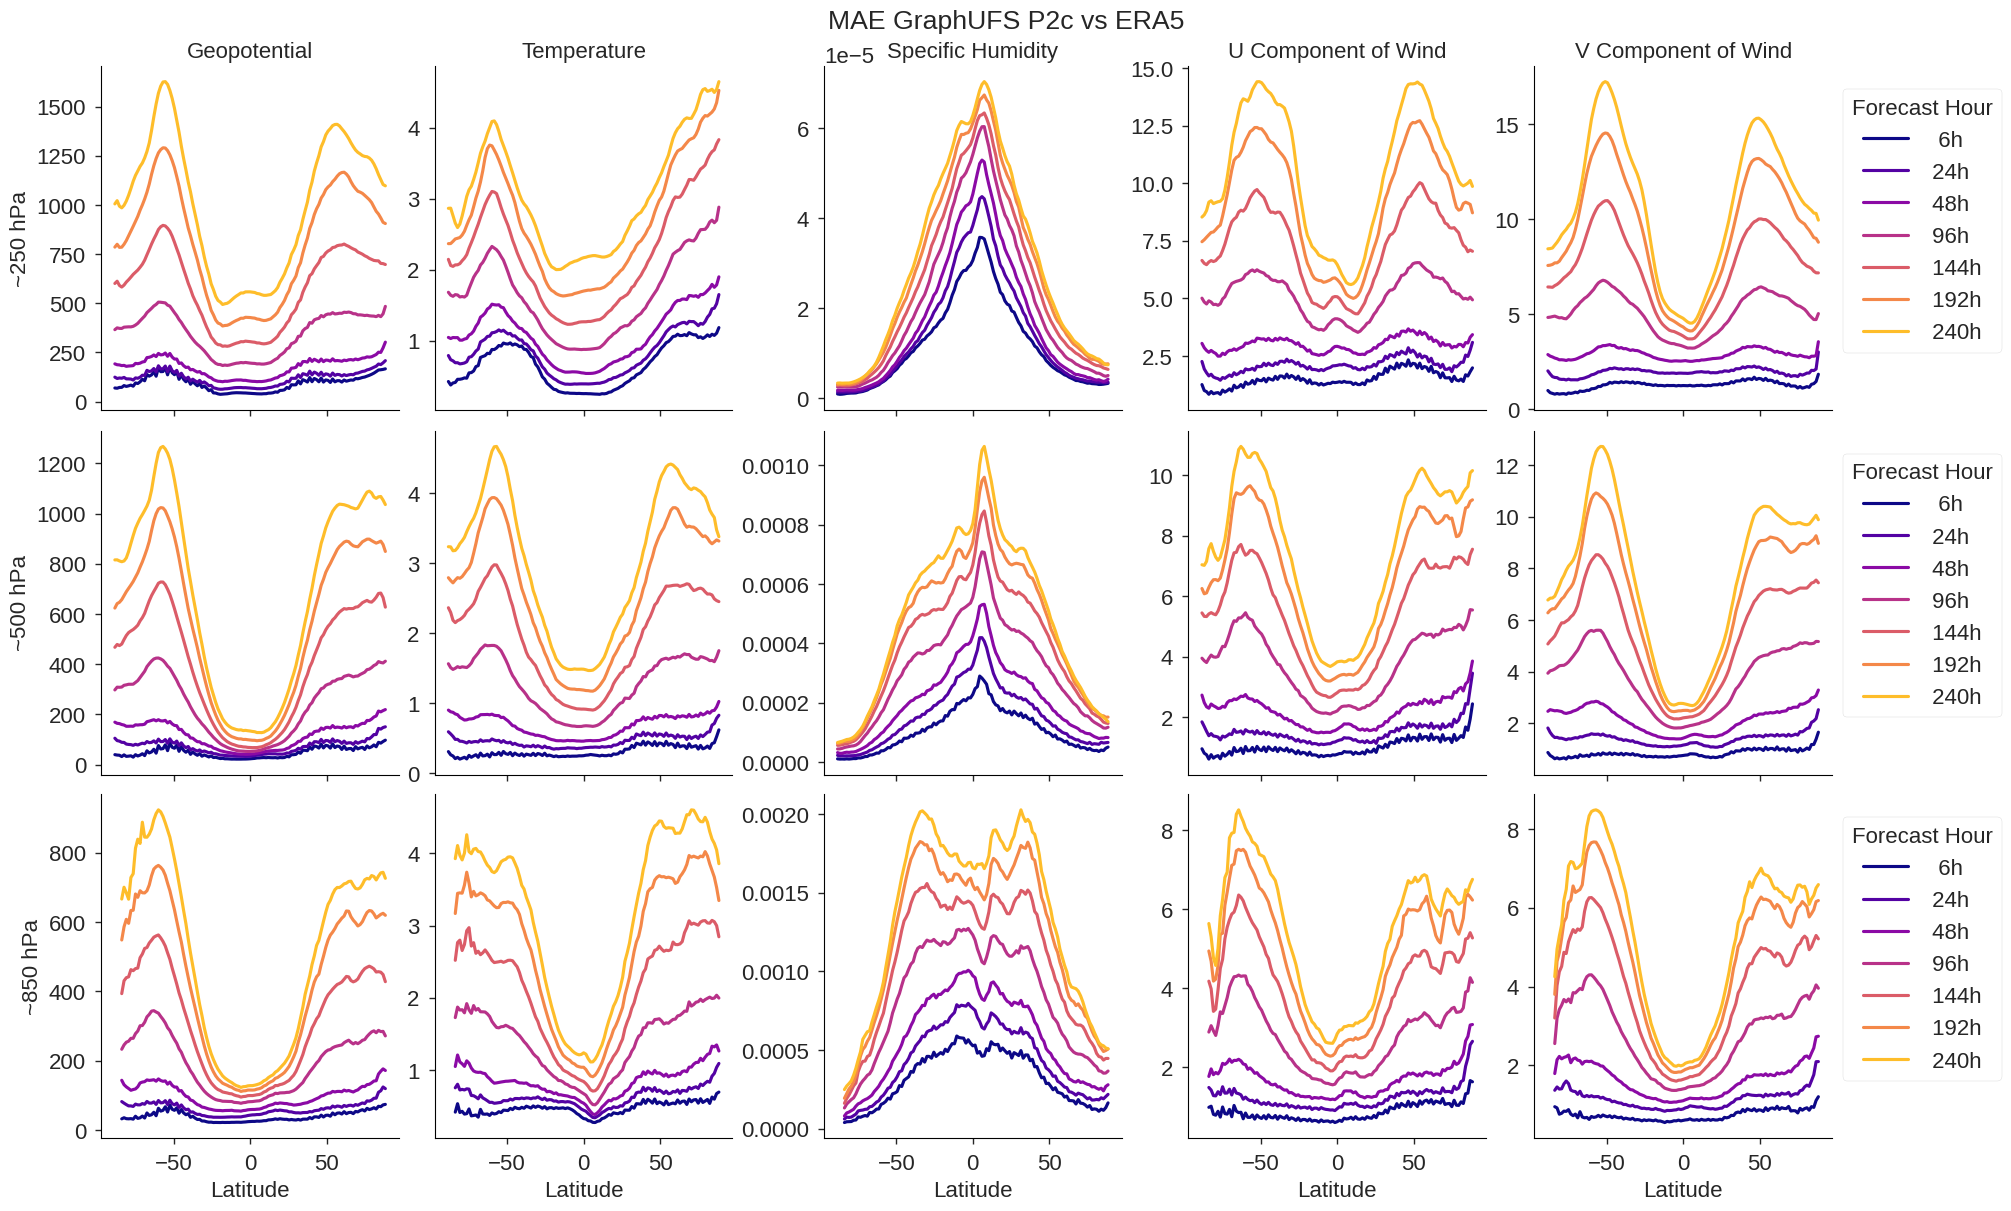

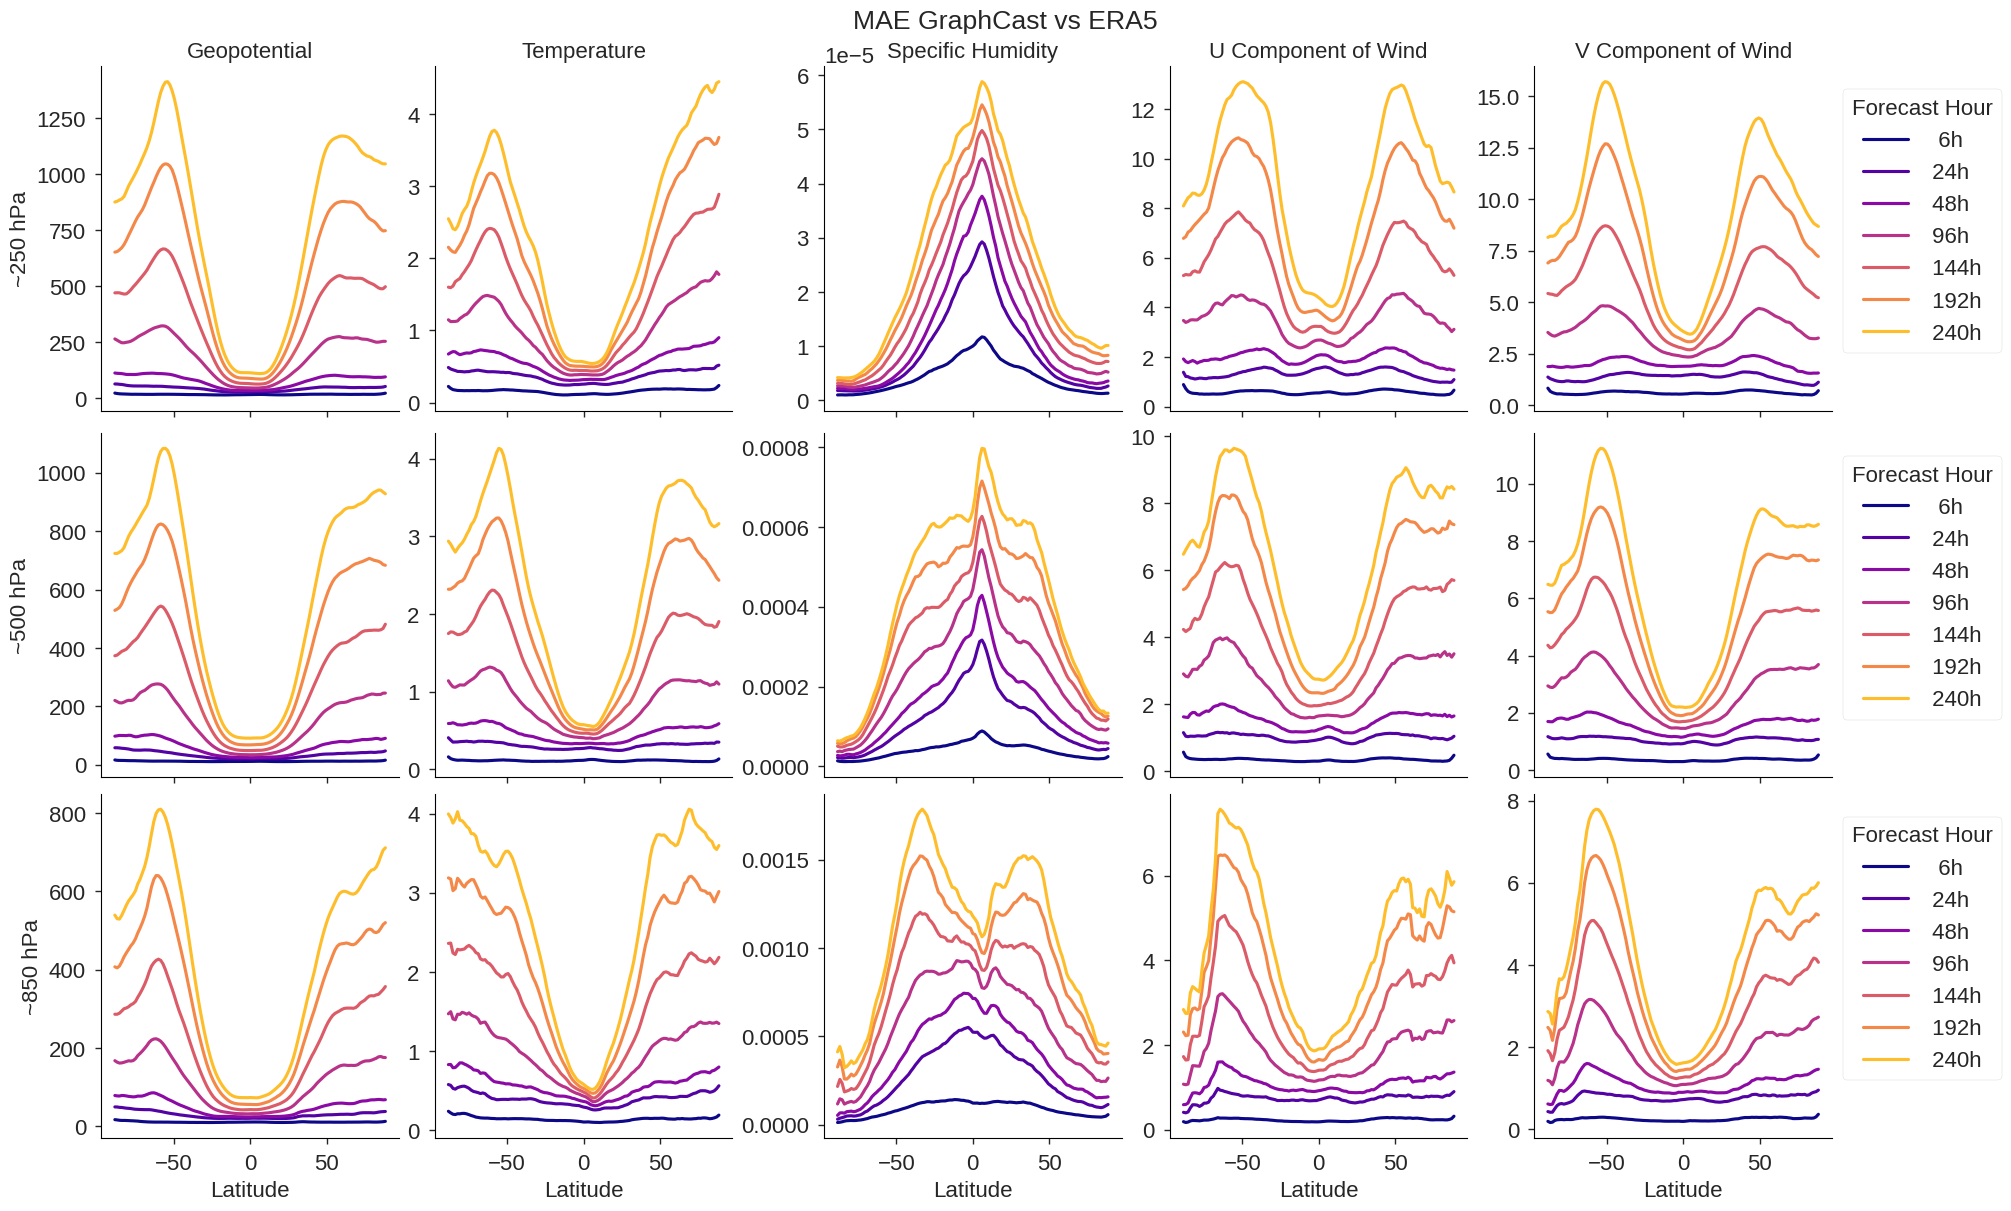

In [36]:
plot_levels(p2);
plot_levels(p2c);
plot_levels(gc);